# **Car Sales Data Analysis**

**Overview**

---
As my very first project as Data Analyst, I selected this short 50,000 * 7 car sales dataset. It includes different car brands, their models, engine size, mileage, price and more. I am going to perform Exploratory Data Analysis to break through the distribution, patterns and trends in the dataset.


**Purpose**

---
Performing EDA on the Car Sales Data to have an insight on


*   Distribution of Brands and there respective models.
*   Distribution of Fuel types.


*   Correlation between different variables that can affect prices.

*   Visualisations.










**Let's get started**

---
Uploading dataset from local system. Importing libraries and loading the dataset.


In [21]:
#uploading the dataset
from google.colab import files
uploaded= files.upload()

Saving car_sales_data.csv to car_sales_data (1).csv


In [22]:
#importing python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [23]:
#loading dataset into the notebook
data_table= pd.read_csv('car_sales_data.csv')
data_table.head()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


# **Explorartory Data Analysis**

In [24]:
data_table.shape #returns the size of dataset.

(50000, 7)

In [27]:
data_table.isnull().sum() #returns the sum of null values for each column if any.

,0
Manufacturer,0
Model,0
Engine size,0
Fuel type,0
Year of manufacture,0
Mileage,0
Price,0


In [25]:
data_table.describe() #to look into the statistical summery of the dataset.

,Engine size,Year of manufacture,Mileage,Price
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.773058,2004.209440,112497.320700,13828.903160
std,0.734108,9.645965,71632.515602,16416.681336
min,1.000000,1984.000000,630.000000,76.000000
25%,1.400000,1996.000000,54352.250000,3060.750000
50%,1.600000,2004.000000,100987.500000,7971.500000
75%,2.000000,2012.000000,158601.000000,19026.500000
max,5.000000,2022.000000,453537.000000,168081.000000


In [26]:
data_table.dtypes #returns datatypes for each column.

,0
Manufacturer,object
Model,object
Engine size,float64
Fuel type,object
Year of manufacture,int64
Mileage,int64
Price,int64


**Working with Dataset**

---
Divided the dataset into 2 groups (df and df1) as categorical data and numerical data (for step by step analysis).


In [8]:
#DATASET df
df= data_table[['Manufacturer','Model','Fuel type','Year of manufacture']] #categorical analysis

In [28]:
df

,Manufacturer,Model,Fuel type,Year of manufacture
0,Ford,Fiesta,Petrol,2002
1,Porsche,718 Cayman,Petrol,2016
2,Ford,Mondeo,Diesel,2014
3,Toyota,RAV4,Hybrid,1988
4,VW,Polo,Petrol,2006
...,...,...,...,...
49995,BMW,M5,Petrol,2018
49996,Toyota,Prius,Hybrid,2003
49997,Ford,Mondeo,Diesel,2022
49998,Ford,Focus,Diesel,2016


In [30]:
#brand name with their respective models count.
for manufacturer_name in df['Manufacturer'].unique():
    models_count = df[df['Manufacturer'] == manufacturer_name]['Model'].value_counts().reset_index()
    models_count.columns = ['Model', 'Count']
    models_count_df = models_count.set_index('Model')
    models_count_df.columns = [manufacturer_name] #Rename the count column to manufacturer_name
    print(f"\nTable for {manufacturer_name}:")
    display(models_count_df)
    print("\n" + "-"*30 + "\n") #Separator for readability


Table for Ford:


,Ford
Model,
Mondeo,5058
Focus,4976
Fiesta,4925



------------------------------


Table for Porsche:


,Porsche
Model,
911,872
Cayenne,870
718 Cayman,867



------------------------------


Table for Toyota:


,Toyota
Model,
RAV4,4292
Prius,4171
Yaris,4091



------------------------------


Table for VW:


,VW
Model,
Golf,5050
Polo,4992
Passat,4871



------------------------------


Table for BMW:


,BMW
Model,
Z4,1688
M5,1645
X3,1632



------------------------------



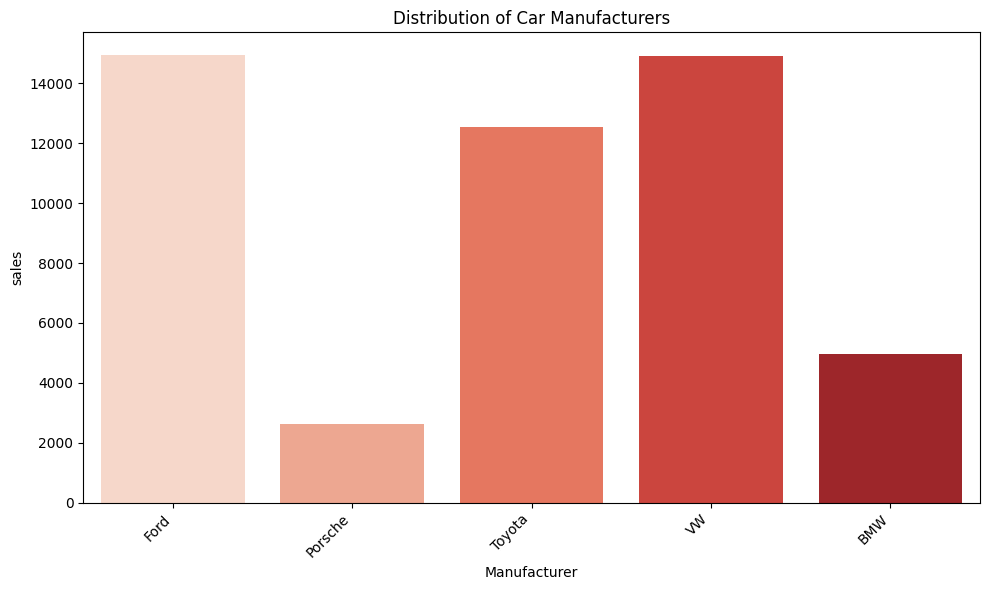

In [40]:
#countplot for cars manufacturers distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Manufacturer', data=df, palette='Reds')
plt.title('Distribution of Car Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

By the above analysis using looping, groupby function and more, we can see the brand and their respective models with their counts. The graph highlights a significant disparity in sales volume among the car manufacturers in this dataset. The VW and Ford are the most dominant manufacturers in this dataset, Toyota comes in next, with sales around 12,500, indicating a strong presence too.  BMW has a noticeably smaller share, with sales hovering around 5,000 and Porsche has the lowest sales among the listed manufacturers, with a count of less than 3,000 cars.

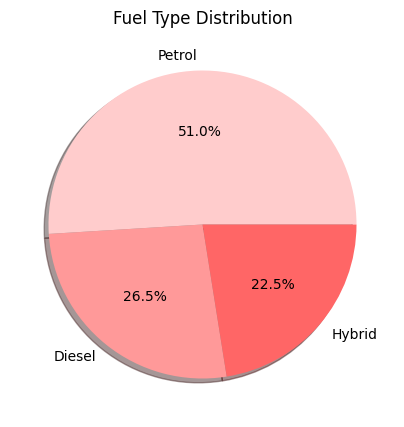

In [33]:
#distribution of another categorical variable Fuel type
plt.figure(figsize=(12,5))
plt.title('Fuel Type Distribution')
plt.pie(df['Fuel type'].value_counts(), labels=df['Fuel type'].value_counts().index, shadow= True,
        colors=['#FFCCCC', '#FF9999', '#FF6666'], autopct='%1.1f%%')
plt.show()

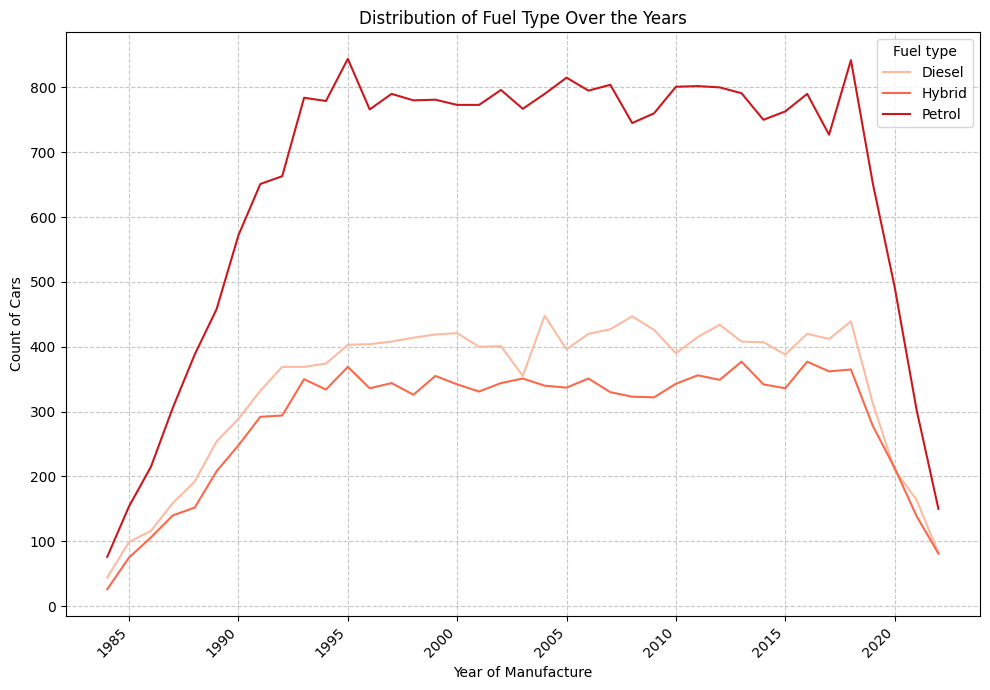

In [65]:
# Group by 'Year of manufacture' and 'Fuel type' and count occurrences
fuel_type_distribution = df.groupby(['Year of manufacture', 'Fuel type']).size().reset_index(name='Count')

plt.figure(figsize=(10, 7))
sns.lineplot(x='Year of manufacture', y='Count', hue='Fuel type', data=fuel_type_distribution, palette='Reds')
plt.title('Distribution of Fuel Type Over the Years')
plt.xlabel('Year of Manufacture')
plt.ylabel('Count of Cars')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

By the above two charts, the 1st chart concludes which fuel type has the most impact when customer purchases a car. While the 2nd chart shows the petrol fuel type shows a significant increase in the count of cars manufactured from the mid-1980s, reaching its peak around the late 1990s or early 2000s. After this period, there's a general decline in the number of petrol cars, with a particularly sharp drop observed in the later years of the dataset (around 2018-2022).The count of Diesel cars also shows a rising trend from the mid-1980s, peaking later than petrol, roughly between 2005 and 2010. Similar to petrol, it experiences a decline in later years, hybrid vehicles shows a more gradual and consistent increase over the entire period, with fluctuations but generally trending upwards until a slight decline towards the end.





In [35]:
#DATASET df1
df1= data_table[['Engine size','Year of manufacture','Mileage','Price']]
df1

,Engine size,Year of manufacture,Mileage,Price
0,1.0,2002,127300,3074
1,4.0,2016,57850,49704
2,1.6,2014,39190,24072
3,1.8,1988,210814,1705
4,1.0,2006,127869,4101
...,...,...,...,...
49995,5.0,2018,28664,113006
49996,1.8,2003,105120,9430
49997,1.6,2022,4030,49852
49998,1.0,2016,26468,23630


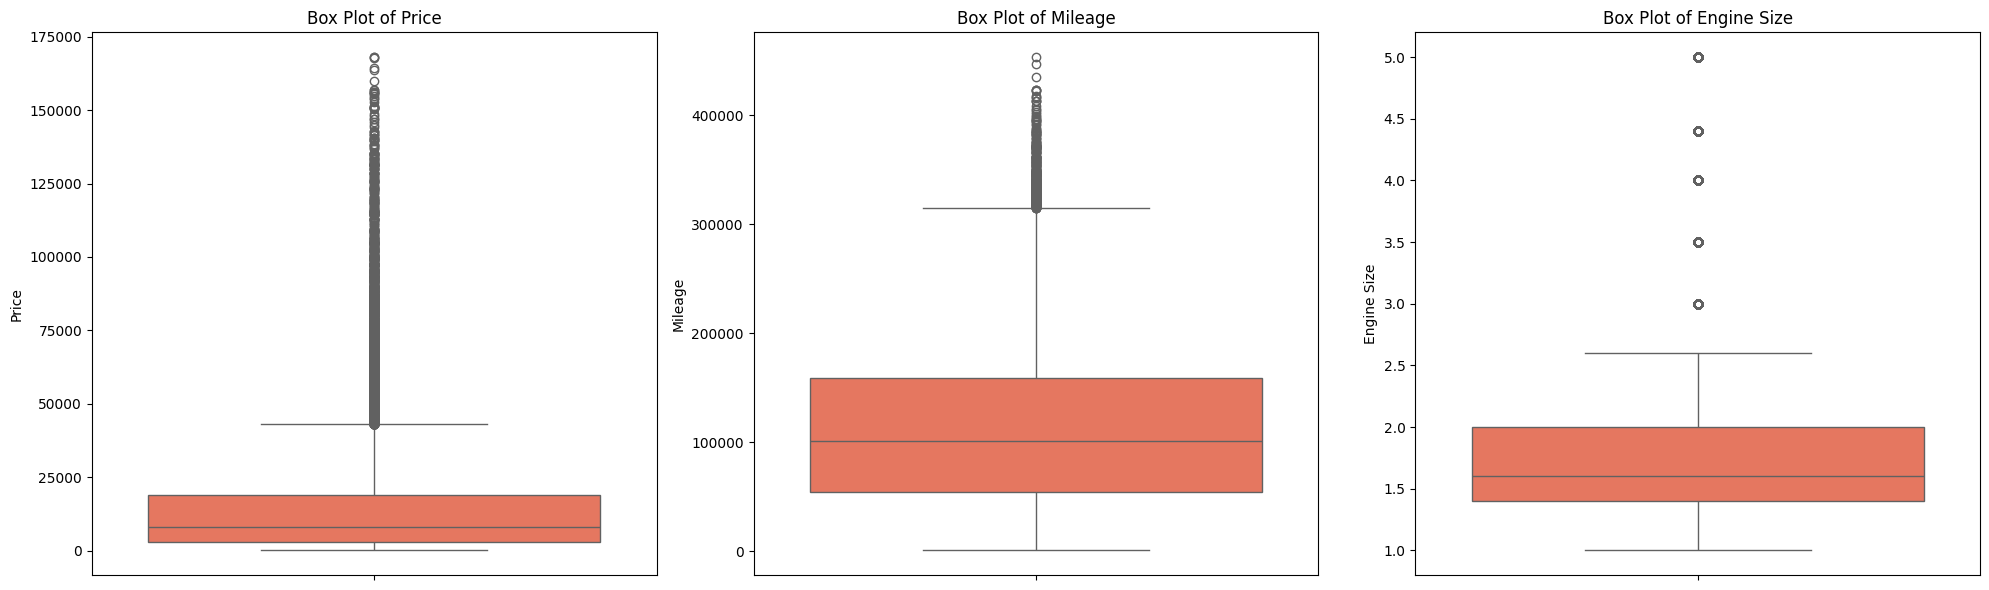

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.boxplot(ax=axes[0], y=df1['Price'], palette='Reds')
axes[0].set_title('Box Plot of Price')
axes[0].set_ylabel('Price')

sns.boxplot(ax=axes[1], y=df1['Mileage'], palette='Reds')
axes[1].set_title('Box Plot of Mileage')
axes[1].set_ylabel('Mileage')

sns.boxplot(ax=axes[2], y=df1['Engine size'], palette='Reds')
axes[2].set_title('Box Plot of Engine Size')
axes[2].set_ylabel('Engine Size')

plt.tight_layout()
plt.show()

By analyzing the box plots for 'Price', 'Mileage', and 'Engine Size', we can observe the following:

### Price Distribution
The box plot for 'Price' shows a highly skewed distribution towards lower prices. The median price is relatively low, indicating that the majority of cars in the dataset are in the lower price range. There is a significant presence of outliers extending to very high prices, suggesting a few luxury or high-value cars in the dataset that are considerably more expensive than the average.

### Mileage Distribution
The 'Mileage' box plot reveals a wide spread of data. The median mileage is around 100,000, with the interquartile range (IQR) indicating that most cars have mileage between approximately 50,000 and 150,000. Similar to 'Price', there are numerous outliers on the higher end, representing cars with exceptionally high mileage.

### Engine Size Distribution
For 'Engine Size', the distribution appears more concentrated than price or mileage. The median engine size is around 1.6-1.8 liters, with the bulk of cars falling within a relatively narrow range, perhaps between 1.4 and 2.0 liters. While there are some outliers for larger engine sizes (up to 5.0 liters), they are not as spread out or numerous as the outliers in 'Price' or 'Mileage', suggesting that most cars have moderate engine sizes with fewer extreme values.

In [47]:
#removing outliers using Interquartile range for the numerical variables
for col in ['Price','Mileage','Engine size']:
  q1= df1[col].quantile(0.25)
  q3= df1[col].quantile(0.75)
  iqr= q3-q1

  #define lower and upper bounds for outliers
  lower_bound= q1-1.5*iqr
  upper_bound= q3+1.5*iqr

  #filter out outliers
  df1= df1[(df1[col]>= lower_bound) & (df1[col]<= upper_bound)]

In [48]:
df1.shape

(42847, 4)

After removing outliers from the variables 'Engine size', 'Price', 'Mileage' we now have the dataset with the size of 42847 entries.

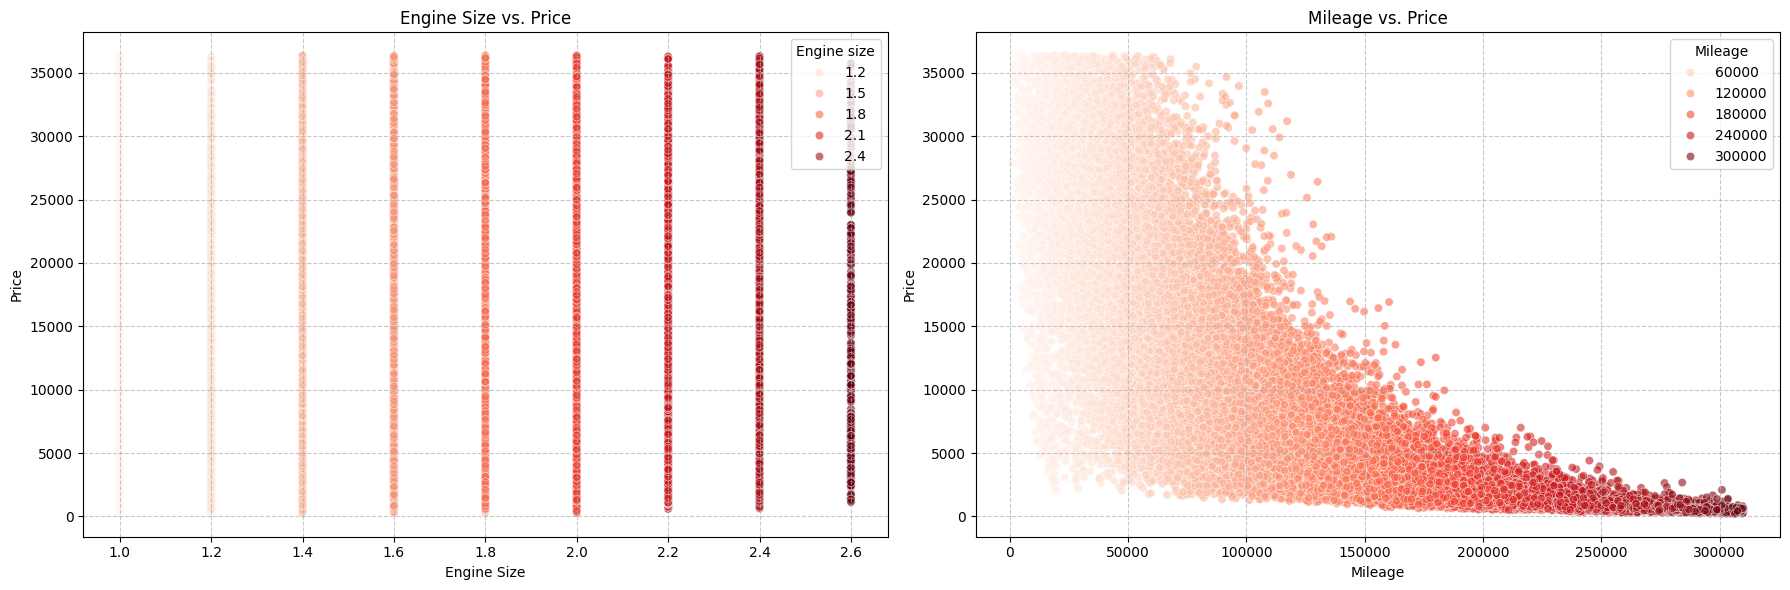

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.scatterplot(ax=axes[0], x='Engine size', y='Price', data=df1, alpha=0.6, hue='Engine size', palette='Reds', legend=True)
axes[0].set_title('Engine Size vs. Price')
axes[0].set_xlabel('Engine Size')
axes[0].set_ylabel('Price')
axes[0].grid(True, linestyle='--', alpha=0.7)

sns.scatterplot(ax=axes[1], x='Mileage', y='Price', data=df1, alpha=0.6, hue='Mileage', palette='Reds', legend=True)
axes[1].set_title('Mileage vs. Price')
axes[1].set_xlabel('Mileage')
axes[1].set_ylabel('Price')
axes[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

.**Engine Size vs. Price (Left Plot)**:

Positive Relationship: The plot for 'Engine size' vs. 'Price' indicates a generally positive correlation. As the 'Engine size' increases, the 'Price' tends to increase. We can see the clusters of points moving upwards as engine size gets larger.


 **Mileage vs. Price (Right Plot)**:

Negative Relationship: The plot for 'Mileage' vs. 'Price' clearly shows a strong negative correlation. As 'Mileage' increases, the 'Price' of the car significantly decreases.

Depreciation: This plot visually confirms the concept of car depreciation, where the value of a vehicle diminishes with the distance it has traveled.

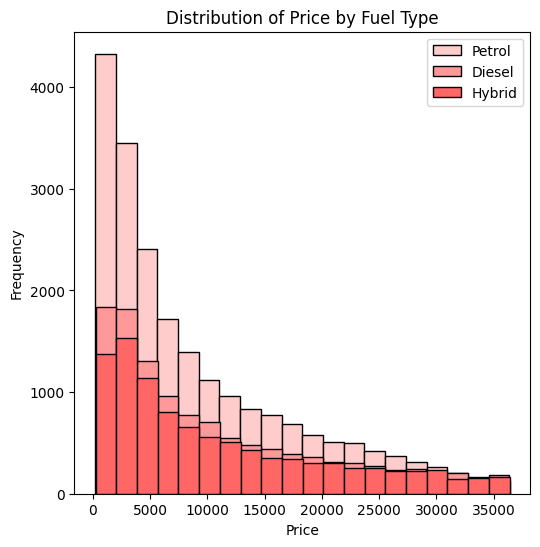

In [64]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
plt.title('Distribution of Price by Fuel Type')
plt.hist(df1[df['Fuel type']=='Petrol']['Price'], histtype='barstacked', bins=20, edgecolor='k', color='#FFCCCC', label='Petrol')
plt.hist(df1[df['Fuel type']=='Diesel']['Price'], histtype='barstacked', bins=20, edgecolor='k', color='#FF9999', label='Diesel')
plt.hist(df1[df['Fuel type']=='Hybrid']['Price'], histtype='barstacked', bins=20, edgecolor='k', color='#FF6666', label='Hybrid')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The histogram shows that the price distribution across all fuel types is heavily right-skewed. The vast majority of cars are concentrated in the lower price brackets (e.g., below £5,000 to £10,000), with frequencies rapidly decreasing as the price increases. This suggests that the dataset contains many more affordable cars than expensive ones.

Petrol cars appear to be the most numerous across almost all price bins, especially in the lower to mid-range. This aligns with our earlier pie chart observation that Petrol is the most common fuel type.

Diesel cars are also present in substantial numbers, particularly in the lower to mid-price ranges. They form the middle layer of the stacked bars. Their frequency decreases with price, similar to petrol.

Hybrid cars are present across the price spectrum shown, forming the base of the stacked bars in most bins. While their absolute numbers might be lower in each bin compared to Petrol or Diesel (due to the stacking), they contribute consistently to the lower and mid-price segments.

In summary, the histogram reinforces that lower-priced cars are dominant in this dataset, and while Petrol cars are the most frequent, Diesel and Hybrid cars also contribute to the various price brackets, with Hybrid cars generally forming a solid base in the more affordable segments.



# Conclusion

---
The Analysis highlights that brand popularity (VW and Ford are most dominent), engine size and especially mileage are significant factors influencing car prices in this dataset.

 The price distribution for all fuel types is right-skewed, with Petrol and Diesel being most frequent. Hybrid cars are consistently present in the lower to mid-price segments.

 Clear trends and distributions has been observed across different car characteristics.

